In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
train_data=pd.read_csv('data/train.csv')
test_data=pd.read_csv('data/test.csv')

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [218]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [219]:
missing_values_train=train_data.isna().sum()
print(missing_values_train.sort_values(ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64


In [220]:
# on va drop les colonnes qui contiennent le plus de valeurs manquantes
train_data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], axis=1, inplace=True)
test_data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], axis=1, inplace=True)

missing_values_train=train_data.isna().sum()
print(missing_values_train.sort_values(ascending=False))

FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageQual        81
GarageFinish      81
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64


In [221]:
train_data['FireplaceQu'].value_counts(dropna=False)

FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: count, dtype: int64

In [222]:
train_data['Fireplaces'].value_counts()

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

In [223]:
# les donées manquantes de 'FireplaceQu' signifient qu'il n'y a pas de cheminée, on va donc remplacer NaN par None
train_data.loc[:, 'FireplaceQu'] = train_data['FireplaceQu'].fillna('None')
test_data.loc[:, 'FireplaceQu'] = test_data['FireplaceQu'].fillna('None')

train_data['FireplaceQu'].value_counts(dropna=False)

FireplaceQu
None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: count, dtype: int64

In [224]:
missing_values_train=train_data.isna().sum()
print(missing_values_train.sort_values(ascending=False))

LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageQual        81
GarageCond        81
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64


<Axes: xlabel='LotFrontage', ylabel='Count'>

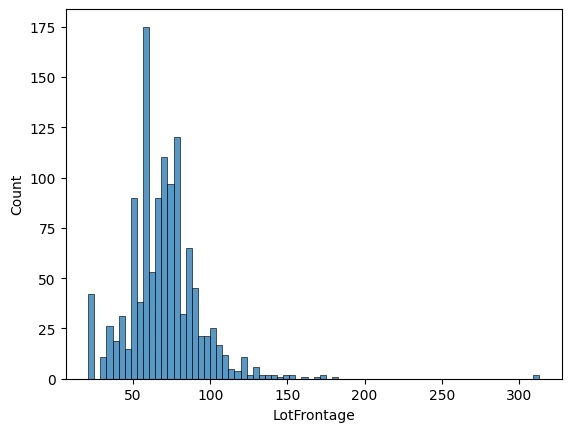

In [225]:
sns.histplot(train_data['LotFrontage'])

In [226]:
train_data.loc[train_data['LotFrontage']>=200,:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,IR2,HLS,AllPub,Inside,...,0,0,0,0,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000


In [227]:
train_data[['Neighborhood', 'LotFrontage', 'YearBuilt', 'TotalBsmtSF', 'GarageArea']].loc[train_data['LotFrontage']>=200,:]

,Neighborhood,LotFrontage,YearBuilt,TotalBsmtSF,GarageArea
934,NAmes,313.0,1960,585,505
1298,Edwards,313.0,2008,6110,1418


Text(0.5, 1.0, 'Distribution of GarageArea')

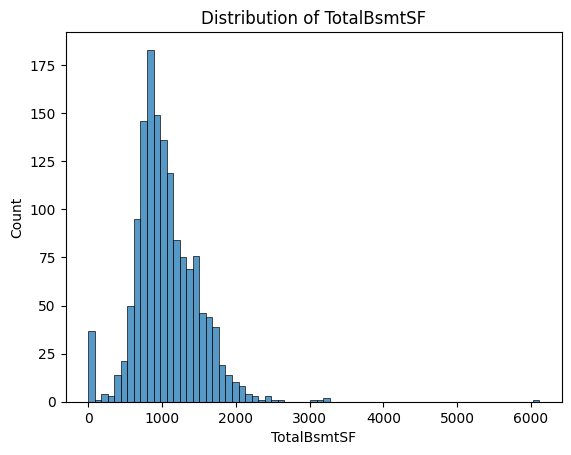

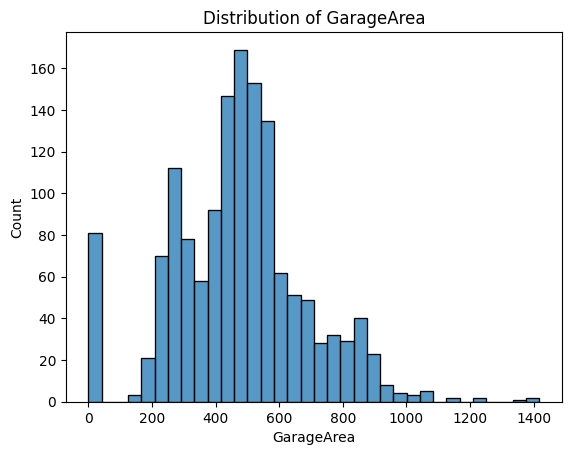

In [228]:
plt.figure()
sns.histplot(train_data['TotalBsmtSF'])
plt.title('Distribution of TotalBsmtSF')

plt.figure()
sns.histplot(train_data['GarageArea'])
plt.title('Distribution of GarageArea')

La ligne (id=1289) semble cohérente car elle possède les plus grandes valeurs de surface sur différentes colonnes. En revanche la ligne (id=934) semble incohérente. On va donc la supprimer dans le doute.

In [229]:
train_data.drop(train_data[train_data['Id']==935].index, inplace=True)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1200 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt    

In [230]:
train_data['GarageType'].value_counts(dropna=False)

GarageType
Attchd     869
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

Pour les colonnes 'GarageType, 'GarageQual', 'GarageCond' et 'GarageFinish', les valeurs manquantes signifient qu'il n'y a pas de garage. On les remplace donc par None.

In [231]:
train_data.loc[:, ['GarageType', 'GarageQual', 'GarageCond', 'GarageFinish']] = train_data[['GarageType', 'GarageQual', 'GarageCond','GarageFinish']].fillna('None')
test_data.loc[:, ['GarageType', 'GarageQual', 'GarageCond', 'GarageFinish']] = test_data[['GarageType', 'GarageQual', 'GarageCond', 'GarageFinish']].fillna('None')

In [232]:
train_data.isna().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [233]:
train_data['LotFrontage'].value_counts(dropna=False)

LotFrontage
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
138.0      1
152.0      1
313.0      1
153.0      1
46.0       1
Name: count, Length: 111, dtype: int64

In [234]:
# On implémente les valeurs manquantes de 'LotFrontage' par la médiane
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())
test_data['LotFrontage']=test_data['LotFrontage'].fillna(train_data['LotFrontage'].median())

In [235]:
train_data.isna().sum().sort_values(ascending=False)

GarageYrBlt      81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtCond         37
                 ..
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
SalePrice         0
Length: 76, dtype: int64

In [236]:
train_data['HasGarage']=train_data['GarageYrBlt'].notna().astype(int)
test_data['HasGarage']=test_data['GarageYrBlt'].notna().astype(int)

In [237]:
train_data[['GarageYrBlt', 'HasGarage']].head()

,GarageYrBlt,HasGarage
0,2003.0,1
1,1976.0,1
2,2001.0,1
3,1998.0,1
4,2000.0,1


<Axes: xlabel='YearBuilt', ylabel='GarageYrBlt'>

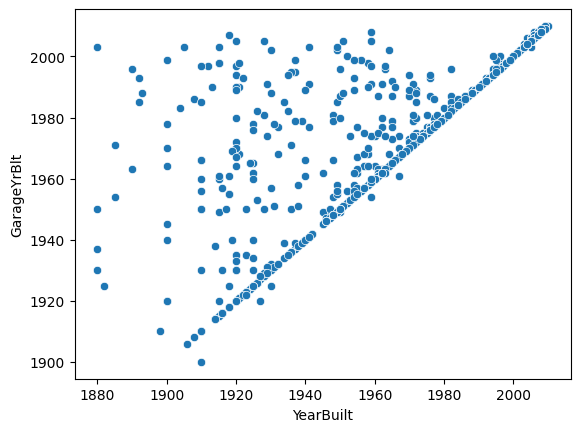

In [238]:
sns.scatterplot(train_data, x='YearBuilt', y='GarageYrBlt')

In [239]:
print(train_data['GarageYrBlt'].dtype)

float64


In [240]:
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(0).astype(int)
test_data['GarageYrBlt']=test_data['GarageYrBlt'].fillna(0).astype(int)

In [241]:
train_data.isna().sum().sort_values(ascending=False)

BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtFinType1     37
BsmtCond         37
                 ..
YrSold            0
SaleType          0
SaleCondition     0
SalePrice         0
HasGarage         0
Length: 77, dtype: int64